# Epitope mapping workflow for M.bovis 
## EMIDA antigen mining project

### Reference:

**Computational selection and testing of novel antigenic targets in the Mycobacterium bovis proteome.** Damien Farrell, Gareth Evans, Chris Pirson, Kerri M Malone, Kevin Rue-Albrecht, Anthony J Chubb, H Martin Vordermeier, Stephen V. Gordon. Plos Computational Biology 2015.

We apply several binding prediction methods to the M. bovis proteome using a subset of human HLA alleles to approximate the bovine immune response. Two different strategies are then applied to filter the resulting set of binders: global binder ranking and epitope density. Several other metrics are applied to produce a final list of peptide candidates.

Contact:

Tuberculosis Molecular Microbiology group,  
School of Veterinary Medicine,  
University College Dublin,  
Dublin 4.  

### Requires:

Old version of mhcpredict library, needs to be updated.

pandas, matplotlib, seaborn

In [173]:
import os,sys
import re
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
home = os.path.expanduser('~')
sys.path.append(os.path.join(home,'python/sandbox/mhcpredict'))
import Base, Genome, Tepitope, EpitopePipeline
from matplotlib_venn import venn2,venn3
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth',80)
import seaborn as sns
sns.set_style("ticks", {'axes.facecolor': '#F7F7F7','axes.grid': False,'legend.frameon':True, 'legend.fontsize':12})
sns.set_context("notebook", font_scale=1.4)
plt.rcParams['savefig.dpi']=150
from IPython.display import display, HTML
#newer module version we use later on
from mhcpredict import base, analysis, sequtils, utilities

In [141]:
genome=Genome.genbank2Dataframe('MTB-H37Rv.gb', cds=True)
mbovis = Genome.genbank2Dataframe('Mbovis.gb', cds=True)
n=3
minsize=2
m='netmhciipan'
gname='MTB-H37Rv'
mhc1alleles = ['BoLA-N:00101','BoLA-N:00201','BoLA-N:00301','BoLA-N:00401',
                 'BoLA-N:00501','BoLA-N:00601','BoLA-N:00801','BoLA-N:00901',
                 'BoLA-N:01001']
otherbinders = {}
otherbinders['iedbmhc1_9'] = pd.read_csv('binders_MTB-H37Rv_iedbmhc1_9_3.csv')
otherbinders['iedbmhc1_11'] = pd.read_csv('binders_MTB-H37Rv_iedbmhc1_11_3.csv')
otherbinders['tepitope'] = pd.read_csv('binders_MTB-H37Rv_tepitope_bovine_3.csv')
otherbinders['netmhciipan'] = pd.read_csv('binders_MTB-H37Rv_netmhciipan_bovine_3.csv')
mapping = pd.read_csv('mbovis_mapping_new.csv',usecols=[1,2,3,4])#,index_col=0)

In [142]:
l1='bovine'
l2='bovine_11'
l3='bovine_15'
file1 = 'binders_%s_%s_%s_%s.csv' %(gname,m,l1,n)
file2 = 'binders_%s_%s_%s_%s.csv' %(gname,m,l2,n)
file3 = 'binders_%s_%s_%s_%s.csv' %(gname,m,l3,n)
b1 = pd.read_csv(file1,index_col=0)
b2 = pd.read_csv(file2,index_col=0)
b3 = pd.read_csv(file3,index_col=0)

In [23]:
EpitopePipeline=reload(EpitopePipeline)
#cl1 = EpitopePipeline.findClusters(b1,m,minsize=minsize)
#n9 = EpitopePipeline.analyseClusters(cl1, genome, gname, m, otherbinders, l=9)
n9 = pd.read_csv('result_%s_%s_9.csv' %(gname,m))

In [24]:
print file1
cols=['locus_tag','R','binders','clustersize','start','end','peptide','RVL','mbname','identity']
print n9[cols][:5]
#print n9.drop_duplicates('peptide')[cols]
#print n9[n9.RVL<=0.35][cols]

binders_MTB-H37Rv_netmhciipan_bovine_3.csv
  locus_tag       R  binders  clustersize  start  end               peptide   RVL   mbname  \
0    Rv1240  23.495        3           13     18   31  GQIGYSLLFRLASGSLLGPD  0.30   Mb1272   
1   Rv1886c  19.799        2           10      6   16  MTDVSRKIRAWGRRLMIGTA  0.30  Mb1918c   
2   Rv2995c  18.974        2           10     92  102  RFELDHHINLRPARLYPGVA  0.35  Mb3019c   
3   Rv2185c  17.748        3           16     52   68  KRARMLMDAAIFKDTLIMSY  0.20  Mb2207c   
4   Rv1886c  17.146        2           10    270  280  PAEFLENFVRSSNLKFQDAY  0.20  Mb1918c   

   identity  
0     100.0  
1     100.0  
2      99.7  
3     100.0  
4     100.0  


In [25]:
EpitopePipeline=reload(EpitopePipeline)
#cl2 = EpitopePipeline.findClusters(b2,m,minsize=minsize)
#n11 = EpitopePipeline.analyseClusters(cl2, genome, gname, m, otherbinders, l=11)
n11 = pd.read_csv('result_%s_%s_11.csv' %(gname,m))

In [26]:
print file2
print n11[cols][:5]
#print n11.peptide.str.len()

binders_MTB-H37Rv_netmhciipan_bovine_11_3.csv
  locus_tag       R  binders  clustersize  start  end               peptide   RVL   mbname  \
0   Rv2995c  18.974        2           12     91  103  RFELDHHINLRPARLYPGVA  0.35  Mb3019c   
1    Rv1484  12.000        2           18     13   31  VSGIITDSSIAFHIARVAQE  0.15   Mb1520   
2   Rv3161c  10.583        2           15    360  375  KEWPGMLAFYRNLAMALVGD  0.25  Mb3186c   
3    Rv1827  10.000        2           12     85   97  RHPDSDIFLDDVTVSRRHAE  0.30   Mb1858   
4    Rv3846   9.592        2           18    164  182  EHAFYLQYKNVKVDFAKAFW  0.15   Mb3876   

   identity  
0      99.7  
1     100.0  
2      99.7  
3     100.0  
4      99.5  


In [27]:
#cl3 = EpitopePipeline.findClusters(b3,m,minsize=minsize)
#n15 = EpitopePipeline.analyseClusters(cl3, genome, gname, m,otherbinders, l=15)
n15 = pd.read_csv('result_%s_%s_15.csv' %(gname,m))

In [28]:
cols1=['locus_tag','R','binders','clustersize','start','end','peptide','mbname','identity']
print file3
print n15[cols1][:5]

binders_MTB-H37Rv_netmhciipan_bovine_15_3.csv
  locus_tag       R  binders  clustersize  start  end               peptide   mbname  identity
0   Rv2460c  20.298        2           16    128  144  ALPNARVLIHQPSLSGVIQG  Mb2487c       100
1    Rv2296  12.728        2           16     57   73  EPTWSYLYRTMIPPLSAAGH   Mb2318       100
2    Rv1594  10.583        2           16    298  314  DRASCKYMKMITPAALLRCL   Mb1620       100
3    Rv1296   9.165        2           18    246  264  AAMTASAEYLRLLRRHNVAA   Mb1328       100
4    Rv2715   9.000        3           17    140  157  VTKDVNIVFRLASLPMGSEA   Mb2734       100


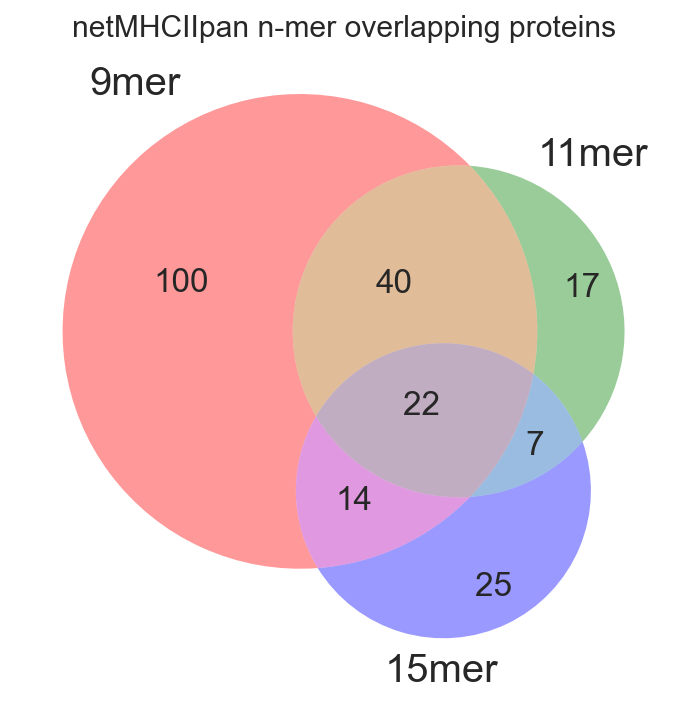

In [29]:
plt.rcParams['font.size']=16
venn3([set(n9.locus_tag),set(n11.locus_tag),set(n15.locus_tag)],set_labels=['9mer','11mer','15mer'])
plt.title('netMHCIIpan n-mer overlapping proteins')
#set(res1[:50].locus_tag) & set(res2[:50].locus_tag)

In [112]:
EpitopePipeline=reload(EpitopePipeline)
mt='tepitope'
file4 = 'binders_%s_%s_%s_%s.csv' %(gname,mt,l1,3)
b4 = pd.read_csv(file4,index_col=0)
#cl4 = EpitopePipeline.findClusters(b4,mt,minsize=minsize)
#t = EpitopePipeline.analyseClusters(cl4, genome, gname, mt,otherbinders)
t = pd.read_csv('result_%s_%s_9.csv' %(gname,mt))

### process cluster results into final files

In [31]:
#combine n11 and n15
nfinal = EpitopePipeline.combineResults(n15,n11)
both = t.merge(nfinal,on='locus_tag')
ovlps = both[abs(both.start_x-both.start_y)<4][['locus_tag','start_x','start_y','peptide_x','peptide_y']]
print len(t[t.locus_tag.isin(ovlps.locus_tag)]), 'overlaps'

#get rid of tepitope peptides that are also in netmhciipan results
tfinal = t[-t.locus_tag.isin(ovlps.locus_tag)].reset_index()
#tfinal=t
print 'final results: %s netmhciipan and %s tepitope' %(len(nfinal), len(tfinal))
fcols=['locus_tag','mbname','identity','R','binders','clustersize','start','end', 'peptide','peplength',
       'concentration','hydro','RVL','source','gene','order','product',
       'iedbmhc1_9_overlap','iedbmhc1_11_overlap','mhc1overlaps']
nfinal[fcols].to_csv('result_MTB-H37Rv_netmhciipan_final.csv')
tfinal[fcols].to_csv('result_MTB-H37Rv_tepitope_final.csv')

#venn3([set(t.locus_tag),set(n11.locus_tag),set(n15.locus_tag)],
#      set_labels=['tepitope','netMHCIIpan 11mer','netMHCIIpan 15mer'],alpha=0.6)
#plt.savefig('cluster_overlaps.png')

22 overlaps
final results: 131 netmhciipan and 102 tepitope


/home/farrell/python/sandbox/mhcpredict/EpitopePipeline.py:1134: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  final=final.sort('R',ascending=False).reset_index(drop=True)


In [ ]:
#summary of binders/clusters?
print len(b2),len(b3),len(b4)
print len(n11),len(n15),len(t)
f,ax=plt.subplots(1,1,figsize=(8,4))
ind=np.arange(0,3)
ln1=ax.bar(ind,[len(b2),len(b3),len(b4)],width=0.4)
ax1=plt.twinx(ax)
ln2=ax1.bar(ind+.5,[len(n11),len(n15),len(t)],width=0.4,color='lightblue')
names=['netMHCIIpan 11mer','netMHCIIpan 15mer','tepitope']
ax.set_xticks(ind+.5)
ax.set_xticklabels(names, minor=False, fontsize=15)
ax.set_ylabel('total binders')
ax1.set_ylabel('filtered clusters')
plt.legend([ln1,ln2],['binders','clusters'])

### get top shared binders

In [204]:
n=3
mhc1binders={}
biedb1 = mhc1binders['iedbmhc1_11'] = pd.read_csv('binders_MTB-H37Rv_iedbmhc1_11_3.csv')
biedb2 = mhc1binders['iedbmhc1_9'] = pd.read_csv('binders_MTB-H37Rv_iedbmhc1_9_3.csv')
EpitopePipeline=reload(EpitopePipeline)
shared = EpitopePipeline.getProteinswithSharedBinders(gname, l1, genome, n=n, otherbinders=mhc1binders)
shared['mhc1overlaps'] = shared.filter(regex="iedbmhc1_").sum(axis=1)
scols = ['locus_tag','mbname','peptide','start','end','rank','iedbmhc1_11_overlap','iedbmhc1_9_overlap']
print shared.sort('locus_tag')[55:65][scols]
print len(shared)

------top shared binder proteins------
read file binders_MTB-H37Rv_tepitope_bovine_3.csv
read file binders_MTB-H37Rv_netmhciipan_bovine_3.csv
8834 shared binders found
239 proteins with top shared binders

/home/farrell/python/sandbox/mhcpredict/EpitopePipeline.py:307: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  best.sort(['rank'],inplace=True)
/home/farrell/python/sandbox/mhcpredict/EpitopePipeline.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[label] = df.apply(lambda r: overlap(r,b),axis=1)



39 known antigens in results
overlaps for iedbmhc1_9
244 with overlapping binders
overlaps for iedbmhc1_11
222 with overlapping binders
454 peptide candidates in 237 proteins after peptide filtering

/home/farrell/python/sandbox/mhcpredict/EpitopePipeline.py:352: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  result = result.sort(['rank','locus_tag']).reset_index()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)



    locus_tag   mbname               peptide  start  end  rank  iedbmhc1_11_overlap  iedbmhc1_9_overlap
157   Rv0500A   Mb0512  VAEVAALMRVSKMTVYRLVH     26   46   299                    1                   0
158   Rv0500A   Mb0512  VRVGRSFRVHAKAVHDMLET     52   72   299                    1                   0
400   Rv0503c  Mb0515c  SNEFFKLWLDPSMTYSCAYF     26   46   498                    1                   1
451   Rv0533c  Mb0547c  SGPRPFVRLEGPAVFRWAAF    212  232   696                    1                   0
378    Rv0577   Mb0592      DPQGAIFSVLKPAPQQ    245  265   461                    0                   0
8     Rv0580c  Mb0595c  HPPAALLRLVNPILRSLLHT     11   31   107                    2                   1
7     Rv0580c  Mb0595c  TAMRGELIRDRAVVSELFLR     94  114   107                    0                   0
150   Rv0632c  Mb0649c  ALEIMKLRLTRSAYQQATGL    140  160   288                    0                   1
205    Rv0635   Mb0654  TAEAQIVQVDQVLKFEKPIV     78   98   319 

In [ ]:
#check our mhc 1 predictions and overlaps!
cols = ['name','peptide','pos','start','end']
bb = biedb1[biedb1.name=='Rv0580c']
ss = EpitopePipeline.getSharedBinders('MTB-H37Rv', 'bovine', genome, 3)
ss = ss[ss.name=='Rv0580c']
print 'mhc1 binders:'
print bb
print 'target:'
print ss[cols]
oo = EpitopePipeline.getOverlappingBinders(ss, bb)   
print
print oo[cols+['overlap']]

'''c=0
X = pd.read_msgpack('epit_MTB-H37Rv_iedbmhc1_11.mpk',iterator=True,chunksize=200)
for df in X:    
    if not type(df) is pd.DataFrame: continue    
    c+=1
    if c>1000: break
    if df.name.iloc[0] == 'Rv0580c':        
        print df.allele.unique()
        print df'''
print

In [44]:
#remove all sharedbinders we have already found in cluster methods!
sh1 = shared.merge(nfinal,on='locus_tag')
sh2 = shared.merge(tfinal,on='locus_tag')
sh = pd.concat([sh1,sh2])
ovlps2 = sh[abs(sh.start_x-sh.start_y)<10][['locus_tag','start_x','start_y','peptide_x','peptide_y']]

sharedfinal = shared[-shared.locus_tag.isin(ovlps2.locus_tag)].reset_index()
scols = ['locus_tag','mbname','peptide','peplength','start','end','rank','concentration',
         'hydro','iedbmhc1_9_overlap','iedbmhc1_11_overlap','mhc1overlaps']
sharedfinal[scols].to_csv('topsharedbinders_final.csv')

print '%s/%s shared binders overlapped with clusters' %(len(ovlps2),len(sharedfinal))
#print sharedfinal[scols][:10]
print sharedfinal[:96].groupby('iedbmhc1_11_overlap').agg({'peptide':np.size})

42/354 shared binders overlapped with clusters
                     peptide
iedbmhc1_11_overlap         
0                         67
1                         20
2                          6
3                          3


mtb_peptides 0.4 0.26
iedb_myco_tcell 0.41 0.22
result_MTB-H37Rv_tepitope_9 0.43 0.28
result_MTB-H37Rv_netmhciipan_9 0.42 0.28
topsharedbinders_MTB-H37Rv 0.41 0.3


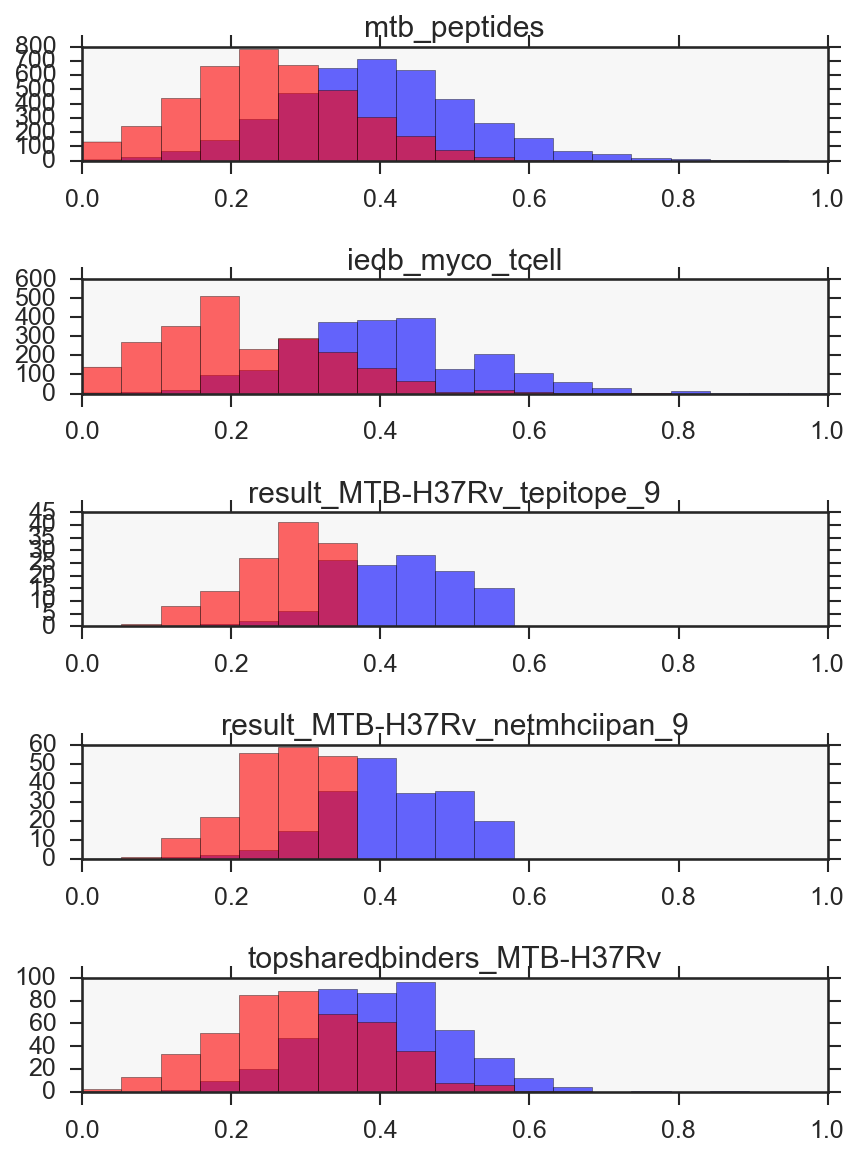

In [45]:
EpitopePipeline=reload(EpitopePipeline)
EpitopePipeline.analysePeptideAAContent()
#EpitopePipeline.analyseAminoAcids()

In [5]:
#reload final lists from files to avoid recalculation
final1 = pd.read_csv('result_MTB-H37Rv_netmhciipan_final.csv',index_col=0)
final2 = pd.read_csv('result_MTB-H37Rv_tepitope_final.csv',index_col=0)
final3 = pd.read_csv('topsharedbinders_final.csv',index_col=0)

In [6]:
#srm data
srm = pd.read_csv('srm_mtb.csv')
srm = genome.merge(srm[['locus_tag','concentration']],on='locus_tag',how='inner')
srm = srm[srm.concentration>0]
print len(srm)
#srm = srm[srm.length<=400]
#print len(srm)

1870


In [48]:
#get final lists, randomise and save to excel sheets
n=96
lcols=['locus_tag','mbname','peptide'] #cols for excel file
f1 = final1[:n]
f1['method']='cl_tepitopepan'
f2 = final2[:n]
f2['method']='cl_netmhciipan'
f3 = final3[:n]
f3['method']='topsharedbinders'

plist = pd.concat([f1,f2,f3]).reset_index(drop=True)

#randomized list
np.random.seed(seed=8) #nb use same seed 
plist = plist.reindex(np.random.permutation(plist.index))
plist.to_csv('peptide_lists.csv') 

writer = pd.ExcelWriter('peptide_lists.xls')
chunks = np.array_split(plist.index, 3)
i=1
for c in chunks:
    plist.ix[c][lcols].to_excel(writer,'list'+str(i))
    i+=1
#also save by method for easy reference    
for i,g in plist.groupby('method'):
    g.sort()[lcols].to_excel(writer,'method'+str(i))
writer.save()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

### get negative lists for benchmarking - the 'baseline' method:

27155 47370
95
overlaps for iedbmhc1_9
41 with overlapping binders
overlaps for iedbmhc1_11
49 with overlapping binders
            id               peptide
69  Mb2635c_69  LFSRKGVVTLEKNGLTEDDV
85   Mb1266_85  SGAWLGLFIGLVLGFFSPNP
12   Mb1687_12  TDLAEWLVRQGVPFRSAHEA
83  Mb1482c_83  FRRAPHLPFDATMTDELGTN
87   Mb0358_87  ARNGEVLVGQPAKNQAVTNV


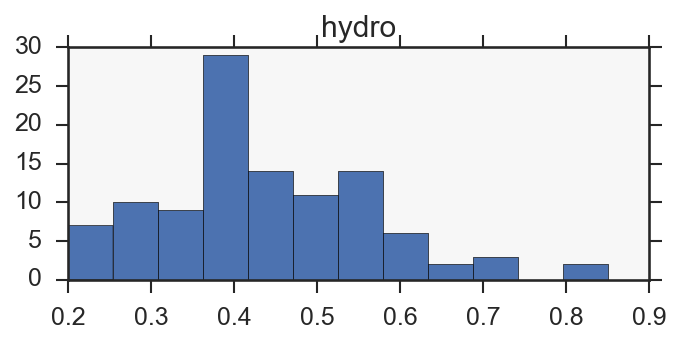

In [205]:
def getRandomNeg(b):
    np.random.seed(seed=8)
    br = b.reset_index(drop=True)
    bneg = br.ix[np.random.choice(br.index, 100)]    
    #use only single binders (no neighbours)?
    return bneg

#take lowest scoring?
#bneg = br1[-290:]
#take random ?

print len(b1), len(b4)
bn1 = getRandomNeg(b1)
bn4 = getRandomNeg(b4)
bneg = pd.concat([bn1,bn4])
#remove zero abundance data using srm data
bneg = bneg[bneg.name.isin(srm.locus_tag)]

def getpeptide(b, genome):
    #add fix for short peptides...
    b = bneg.merge(genome[['locus_tag','length','translation']],
                                left_on='name',right_on='locus_tag')

    b['start'] = b.apply(lambda x: x.pos-6 if x.pos>6 else 0,axis=1)
    b['end'] = b.apply(lambda x: x.pos+14 if x.pos>6 else 20,axis=1)
    b['peptide'] = b.apply(lambda x: x.translation[int(x.start):int(x.end)],axis=1)
    return b

bneg = getpeptide(bneg, genome)
bneg['hydro'] = bneg.apply(EpitopePipeline.getAAFraction,axis=1)
bneg['RVL'] = bneg.apply(lambda x: EpitopePipeline.getAAFraction(x,aas=['R','V','L']),axis=1)

mapping = pd.read_csv('mbovis_mapping_new.csv',usecols=[1,2,3,4])
bneg = bneg.merge(mapping,left_on='locus_tag',right_on='tbname',how='inner')
#remove <20mers
bneg = bneg[bneg.peptide.str.len()==20]
#filter hydro?
#bneg = bneg[bneg.hydro<=0.6]
bneg.hist('hydro',bins=12,figsize=(5,2),grid=False)

#remove any overlapping in positives!
#print bneg[bneg.columns[3:10]].merge(plist[['locus_tag','peptide']],on='locus_tag',how='inner')
bneg = bneg[-bneg.locus_tag.isin(plist.locus_tag)]
bneg = bneg.drop_duplicates('peptide')
bneg = bneg.reset_index()
bneg = bneg.reindex(np.random.permutation(bneg.index))
bneg.index = bneg.index+1
ind = bneg.index.astype(str)
bneg['id'] = bneg.mbname+'_'+ind

print len(bneg)
x=bneg.copy()
for i in mhc1binders:
    lbl = i+'_overlap'
    print 'overlaps for %s' %i
    x = EpitopePipeline.getOverlappingBinders(x, mhc1binders[i], label=lbl)   
bneg['mhc1overlaps'] = x.filter(regex="iedbmhc1_").sum(axis=1)

bneg.to_csv('negatives_list.csv',index=False)
writer = pd.ExcelWriter('negatives_list.xls')
lcols=['id','peptide']
#print bneg.peptide.str.len().value_counts()
#print len(bneg), len(bneg.peptide.unique())
print bneg[lcols][:5]
bneg[lcols].to_excel(writer,'negatives list')
writer.save()

In [103]:
def responsesbreakdown(res, key='#pos',label=''):
    sns.set_context("notebook", font_scale=1.4)
    s = res.groupby([key,'method']).agg({'id':np.size})
    s = s.unstack('method')
    s.columns = s.columns.get_level_values(1)
    perc = s.sum(1)
    s=s.sort(axis=1,ascending=False)
    print s
    f,ax=plt.subplots(1,2,figsize=(10,5))
    grid=ax.flat
    perc.plot(kind='pie',ax=grid[0],cmap='Greens',figsize=(9.5,5),startangle=0)
    grid[0].set_title('%s (all methods)' %label,fontsize=18)
    grid[0].set_ylabel('')
    s.plot(kind='barh', grid=False,ax=grid[1])
    grid[1].set_title('%s per method' %label,fontsize=20)
    grid[1].set_ylabel('')
    sns.despine()
    plt.tight_layout()    
    t=s.T
    t=t.fillna(0)  
    #print t
    #print t[t.columns[t.columns>=1]].sum(1)
    print t.sum()
    #en = t[t.columns[t.columns>=1]].sum(1)/t.sum(1)
    return t

def hydroplot(res, key):
    res.boxplot('hydro',by=key,vert=False,grid=False)
    plt.title('peptide hydrophobicity by response')
    plt.suptitle('')
    plt.xlabel('hydrophobicity'); plt.ylabel(key)
    plt.tight_layout()
    plt.savefig('responses_hydrophobicity.png')

### VLA whole blood results:

               tag  #pos
0      CFP10.1_300     2
1      CFP10.2_301     2
2      CFP10.7_302     3
3      CFP10.8_303     2
4      CFP10.9_304     4
5   ESAT-6 p45_305     4
6   ESAT-6 p46_306     3
7   ESAT-6 p47_307     3
8   ESAT-6 p51_308     4
9   ESAT-6 p52_309     4
10  ESAT-6 p53_310     4
11  ESAT-6 p55_311     4
method  topsharedbinders  cl_tepitopepan  cl_netmhciipan  _pos ctrls
#pos                                                                
0                     67              52              52         NaN
1                      8               6              12         NaN
2                      5              17              12           3
3                      9               8               4           3
4                      5               5               8           6
#pos
0    171
1     26
2     37
3     24
4     24
dtype: float64


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort(....) is deprecated, use sort_index(.....)


#pos,0,1,2,3,4,%pos
method,,,,,,
topsharedbinders,67,8,5,9,5,28.723404
cl_tepitopepan,52,6,17,8,5,40.909091
cl_netmhciipan,52,12,12,4,8,40.909091
_pos ctrls,0,0,3,3,6,100.000000


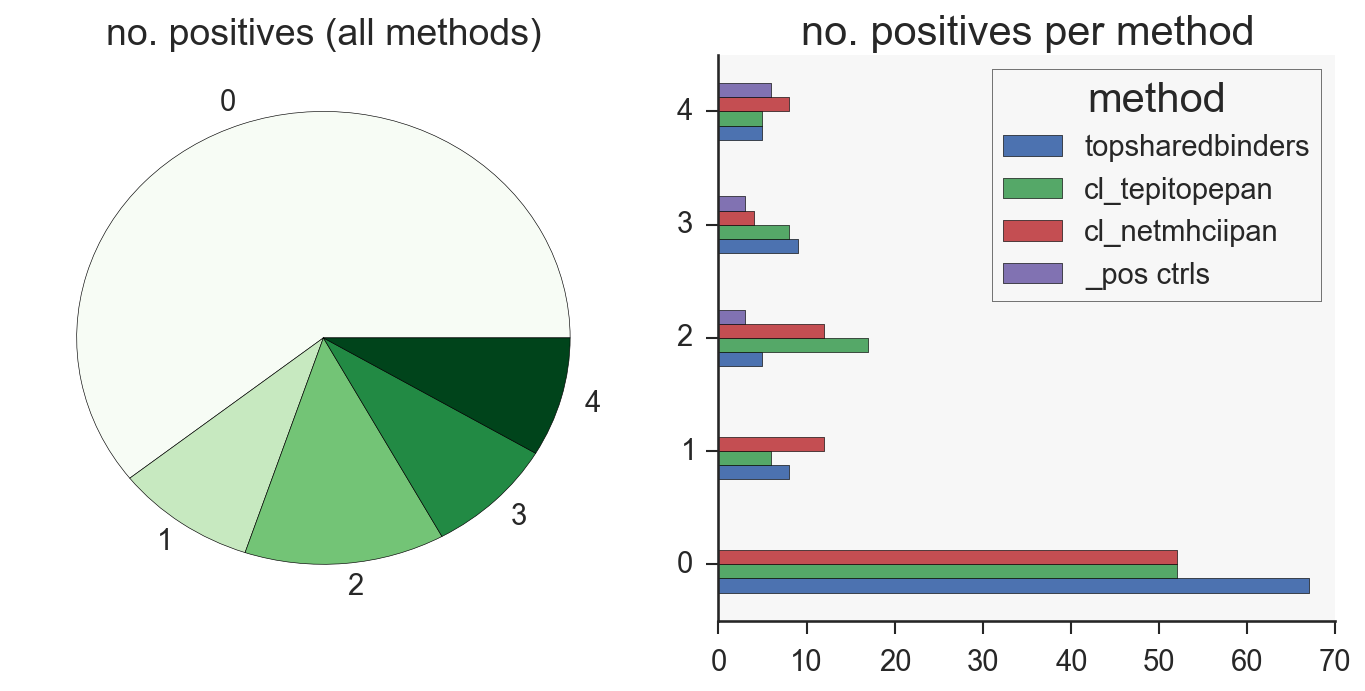

In [104]:
EpitopePipeline=reload(EpitopePipeline)
plt.rcParams['font.size']=20
sns.set_style("ticks", {'axes.facecolor': '#F7F7F7','legend.frameon': True})

#reload peptide list
plist = pd.read_csv('peptide_lists.csv',index_col=0)
#whole blood
wb = pd.read_csv('vla_wholeblood_results.csv')
wbcols = ['8740','8742','8743','8744']

tags = wb.tag.apply( lambda x: pd.Series(x.split('_')))
wb['mbname'] = tags[0]
wb['id'] = tags[1].astype(int)

#merge them
wb = plist.merge(wb,left_index=True,right_on='id',how='right')
wb.ix[wb.method.isnull(), 'method'] = '_pos ctrls'
#wb['both'] = wb.peptide.isin(ovlps.peptide_y)

ctrls = wb[wb.method=='_pos ctrls']
print ctrls[['tag','#pos']]

s=responsesbreakdown(wb, label='no. positives')
plt.savefig('responses_bymethod_wb.png')
s['%pos'] = s[s.columns[-4:]].sum(1)/s.sum(1)*100
s

In [8]:
def responsesheatmap(res, cols, labels=None):
    """heatmap of responses by method"""
    
    l = res['method'].nunique()
    fig,axs = plt.subplots(l,1,figsize=(6,6))
    grid=axs.flatten()
    i=0
    for n,g in res.groupby('method'):
        g['mean'] = g[cols].mean(1)        
        x = g.sort('mean')[cols]        
        x = x.loc[(x>0).any(1)]
        ax=grid[i]
        hm = ax.pcolor(x.T,cmap='Blues')
        ax.set_yticks(np.arange(0.5, len(x.columns)))
        if labels == None:
            names = cols
        else:
            names = labels
        ax.set_yticklabels(names, minor=False, fontsize=10)
        #ax.set_yticks(np.arange(0.5, len(x.index)))
        ax.set_xticks([])
        ax.set_xticklabels('')
        ax.set_xlim(0, len(x.index)-1)
        ax.set_title(n)        
        i+=1
        
    #cb=fig.colorbar(hm, ax=axs[0],orientation='horizontal', aspect=5)
    #plt.setp(cb.ax.get_xticklabels(), rotation='vertical', fontsize=10)
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.4)    


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


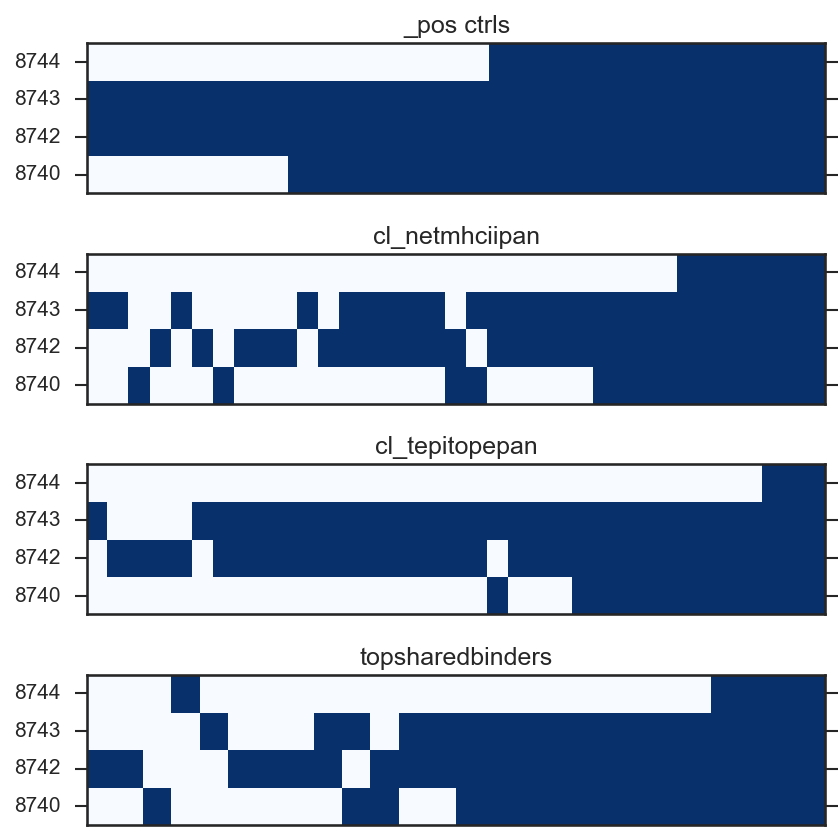

In [286]:
x = wb.copy()
x = x.replace({'-': 0, 'positive': 1})
responsesheatmap(x, cols=wbcols)
plt.savefig('wb_responses_heatmap.png')

### VLA pbmc results:

In [107]:
#pbmc data already has wb positives column in it
pbmc = pd.read_csv('vla_pbmc_results.csv')
pcols = ['7010','7447','7448','7855','7853','7852','7449']
x = pbmc[pcols]
#derive positive rates for each peptide using gareth method of nil mean+3SD and 0.1 cutoff
#nil wells for cutoffs
nil = pd.read_csv('vla_pbmc_nil.csv')

pcut = nil.mean()+nil.std()*3+0.1
pcut2 = nil.mean()+0.1
#pbmcpos = ((x>=pcut) & (x>=pcut2)).astype(int)
#pbmcpos = ((x>=pcut+0.1)).astype(int)
#pbmcpos['method'] = res.method
#responsesheatmap(pbmcpos, cols=pcols)

pbmc['#pbmcpos'] = x[(x>=pcut)].count(1)
#pbmc.plot('#garethpos','#pbmcpos',kind='scatter', figsize=(3,3))

pbmc['mean'] = pbmc[pcols].mean(1)
pbmc['#wbpos'] = pbmc['#wbpos']/4*100
pbmc['#pbmcpos'] = pbmc['#pbmcpos']/7*100
pbmc['#pbmcpos'] = pbmc['#pbmcpos'].astype(int)
pbmc = pbmc.sort_values('#pbmcpos')

#get the mean fraction of both positive counts
pbmc['score'] = (pbmc['#pbmcpos']+pbmc['#wbpos'])/2.0
pbmc['score'] = pbmc.score.round(0)

tags = pbmc.tag.apply( lambda x: pd.Series(x.split('_')))
#pbmc['mbname'] = tags[0]
pbmc['id'] = tags[1].astype(int)

#merge with peptide list
plist = pd.read_csv('peptide_lists.csv',index_col=0)
pbmc = plist.merge(pbmc,left_index=True,right_on='id',how='right')
pbmc.ix[pbmc.method.isnull(), 'method'] = '_pos ctrls'
print pbmc.groupby('method').agg({'id':np.size})

#pbmc = pbmc[pbmc.method!='_pos ctrls']
#responsesbreakdown(r, key='#pbmcpos', label='% positives')

ctrls = pbmc[pbmc.method=='_pos ctrls']
print ctrls[['tag','#pbmcpos']]
print ctrls.groupby('#pbmcpos').agg({'id':np.size}).T
print 

                  id
method              
_pos ctrls        12
cl_netmhciipan    88
cl_tepitopepan    88
topsharedbinders  94
               tag  #pbmcpos
0      CFP10.1_300        14
1      CFP10.2_301        14
11  ESAT-6 p55_311        42
3      CFP10.8_303        42
8   ESAT-6 p51_308        42
7   ESAT-6 p47_307        57
4      CFP10.9_304        57
6   ESAT-6 p46_306        57
10  ESAT-6 p53_310        57
9   ESAT-6 p52_309        57
5   ESAT-6 p45_305        71
2      CFP10.7_302        71
#pbmcpos  14  42  57  71
id         2   3   5   2


### data plots

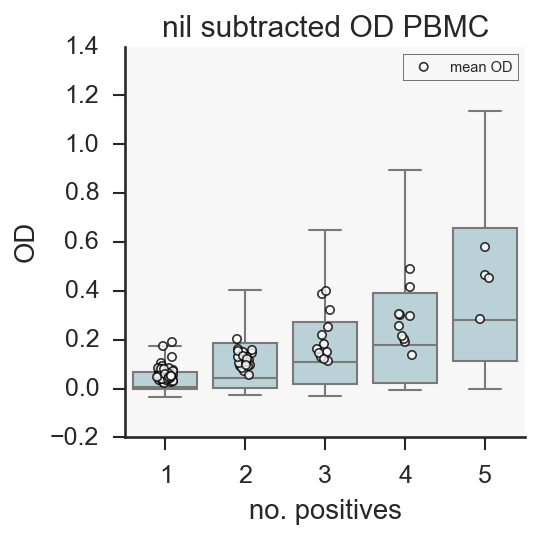

In [10]:
#pbmc data plot
sns.set_context("notebook", font_scale=1.2)
c=['#pbmcpos']+pcols
#subtract nil mean
x = pbmc[pbmc['#pbmcpos']>=1]
x = x[x.method!='_pos ctrls']
x[pcols] = x[pcols]-nil.mean()
x['numpos'] = (x['#pbmcpos']*7/100+1).astype(int)
x['mean'] = x[pcols].mean(1)

t = pd.melt(x,id_vars=['numpos','method'],value_vars=pcols,var_name='animal',value_name='OD')

fig,ax = plt.subplots(1,1,figsize=(4,4))
sns.stripplot(x="numpos", y="mean", data=x,
            alpha=0.8, size=4, jitter=True, linewidth=.8, edgecolor="black", color='white', ax=ax)

ax.legend(['mean OD'],fontsize=7)
sns.boxplot(x="numpos", y="OD", data=t, ax=ax, linewidth=1, saturation=0.5,
           fliersize=0 ,color='lightblue')
ax.set_ylim(-0.2,1.4)
ax.set_xlabel('no. positives')
plt.title('nil subtracted OD PBMC')
plt.tight_layout()
sns.despine()
plt.savefig('oddata_pbmc.png')

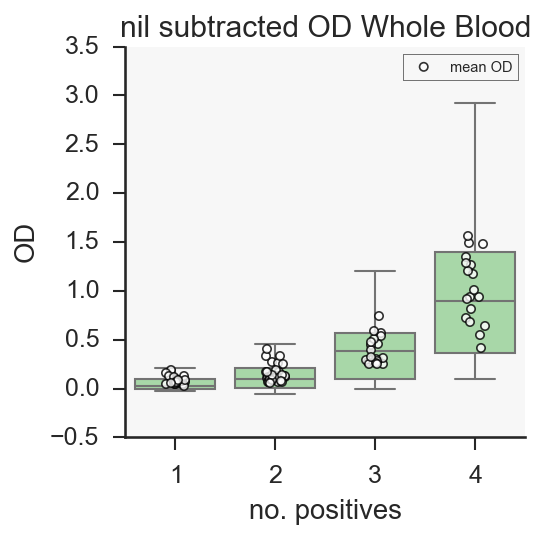

In [11]:
#whole blood data plot
#whole blood values already nil subtracted

wb = pd.read_csv('vla_wholeblood_results.csv')
wb = wb.sort_values('#pos')
cols = ['8740_val','8742_val','8743_val','8744_val']
wb['mean'] = wb[cols].mean(1)

x = wb[wb['#pos']>=1]
x = x[-x.tag.isin(ctrls.tag)]
x['#pos'] = wb['#pos']

t = pd.melt(x,id_vars='#pos',value_vars=cols,var_name='animal',value_name='OD')

fig,ax = plt.subplots(1,1,figsize=(4,4))
sns.stripplot(x="#pos", y="mean", data=x, #hue='animal', palette='Set1',
            alpha=0.8, size=4, jitter=True, linewidth=.8, edgecolor="black", color='white', ax=ax)
ax.legend(['mean OD'],fontsize=7)
sns.boxplot(x="#pos", y="OD", data=t, ax=ax, linewidth=1, saturation=0.5,
           fliersize=0 ,color='lightgreen')
plt.title('nil subtracted OD Whole Blood')
ax.set_xlabel('no. positives')
plt.tight_layout()
sns.despine()
plt.savefig('oddata_wb.png')

### pbmc results for baseline/control set

In [108]:
pbmcbl = pd.read_csv('vla_pbmc_baseline.csv')
x = pbmcbl[pcols]

#nil wells for cutoffs
nil = pd.read_csv('vla_pbmc_nil_baseline.csv')
blcut = nil.mean()+nil.std()*3+0.1
blcut2 = nil.mean()+0.1
pbmcbl['#pbmcpos'] = x[(x>=blcut)].count(1)
pbmcbl['#pbmcpos'] = pbmcbl['#pbmcpos']/7*100
pbmcbl['#pbmcpos'] = pbmcbl['#pbmcpos'].astype(int)
pbmcbl.rename(columns={'method':'predictor'})

neglist = pd.read_csv('negatives_list.csv',index_col=0)
pbmcbl = neglist.merge(pbmcbl,on='id')
print len(pbmcbl)
print pbmcbl[:2]
pbmcbl['method'] = 'random binders'

94
   1-log50k(aff)  allele       core    method     name  nearest               peptide  pos  \
0            NaN       7  VVTLEKNGL  tepitope  Rv2603c        7  LFSRKGVVTLEKNGLTEDDV  139   
1            NaN       6  LFIGLVLGF  tepitope   Rv1234       17  SGAWLGLFIGLVLGFFSPNP   97   

     score locus_tag  length                                        translation  start  end  \
0  3.66019   Rv2603c     251  MSGHSKWATTKHKKAVVDARRGKMFARLIKNIEVAARVGGGDPAGN...    133  153   
1  5.10000    Rv1234     175  MTSPFQPRQVPGSTPAAAGAGRRGVPALPTPPKGWPVGSYPTYAEA...     91  111   

   hydro   RVL   tbname   mbname  identity  overlap          id  mhc1overlaps plate_no    7010  \
0   0.35  0.35  Rv2603c  Mb2635c       100      251  Mb2635c_69             1       A1  0.1565   
1   0.55  0.25   Rv1234   Mb1266       100      175   Mb1266_85             2       B1  0.1360   

     7447    7448    7855   7853    7852    7449  #pbmcpos  
0  0.5780  0.2145  0.0485  0.075  0.1040  0.1425        14  
1  0.1565  

### create a final dataframe with all results

376

method
_pos ctrls          12
cl_netmhciipan      88
cl_tepitopepan      88
random binders      94
topsharedbinders    94
dtype: int64
method            confidence
_pos ctrls        high          12
cl_netmhciipan    negative      56
                  low           10
                  high          22
cl_tepitopepan    negative      55
                  low           15
                  high          18
random binders    negative      46
topsharedbinders  negative      70
                  low            8
                  high          16
dtype: int64
method    topsharedbinders  random binders  cl_tepitopepan  cl_netmhciipan  _pos ctrls
#pbmcpos                                                                              
0                       62              61              57              51         NaN
14                      21              31              16              16           2
28                       5               2               7               9         Na

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort(....) is deprecated, use sort_index(.....)


,0_x,1,2,3,4,%pos_x,0_y,14,28,42,57,71,%pos_y
method,,,,,,,,,,,,,
topsharedbinders,67,8,5,9,5,28.723404,62,21,5,4,2,0,11.702128
random binders,0,0,0,0,0,0.000000,61,31,2,0,0,0,2.127660
cl_tepitopepan,52,6,17,8,5,40.909091,57,16,7,4,4,0,17.045455
cl_netmhciipan,52,12,12,4,8,40.909091,51,16,9,4,4,4,23.863636
_pos ctrls,0,0,3,3,6,100.000000,0,2,0,3,5,2,83.333333


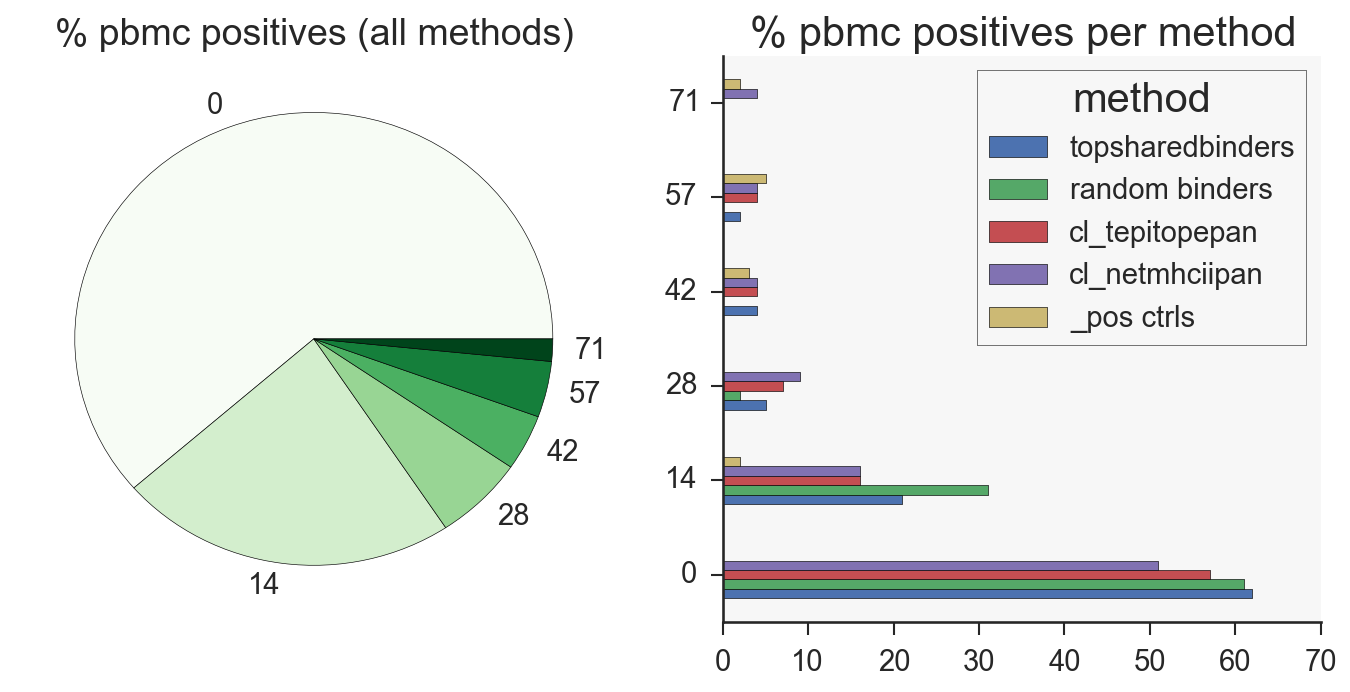

In [109]:
final = pd.concat([pbmc,pbmcbl])

#calculate final confidence levels by binning score based on positive controls
bins = [0,15,30,100]
final['confidence'] = pd.cut(final.score, bins=bins, precision=0, include_lowest=True,
                             labels=['negative','low','high'])
final = final.drop(['tbname','translation','product','name','nearest','plate_no','rank','pos'],axis=1)
final.to_csv('final_results_all.csv')
print len(final)
print
print final.groupby('method').size()
print final.groupby(['method','confidence']).size().T
print

s2 = responsesbreakdown(final, key='#pbmcpos', label='% pbmc positives')
plt.savefig('responses_bymethod_pbmc.png')
#s2.cumsum().sum()
s2['%pos'] = s2[s2.columns[-4:]].sum(1)/s2.sum(1)*100
s2 = s.merge(s2,left_index=1,right_index=1,how='right').fillna(0)
display(s2)


### pbmc responses breakdown

In [ ]:
#get boolean arrays for heatmap by subtracting cuts

xfinal = (final[pcols]>=pcut).astype(int)
xfinal['method'] = final.method
xbl = (pbmcbl[pcols]>=blcut).astype(int)
xbl['method'] = 'baseline'
xctrls = (ctrls[pcols]>=pcut).astype(int)
xctrls['method'] = '_pos ctrls'
xcomb = pd.concat([xfinal,xbl,xctrls])

responsesheatmap(xcomb, cols=pcols)
plt.savefig('pbmc_responses_heatmap.png')

### final breakdown of combined responses

method      topsharedbinders  cl_tepitopepan  cl_netmhciipan
confidence                                                  
high                      16              18              22
low                        8              15              10
negative                  70              55              56
confidence
high         56
low          33
negative    181
dtype: int64
1.67231177018


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort(....) is deprecated, use sort_index(.....)


confidence,high,low,negative,%pos
method,,,,
topsharedbinders,16,8,70,82.978723
cl_tepitopepan,18,15,55,79.545455
cl_netmhciipan,22,10,56,75.000000


mean score of positive controls: 64.75


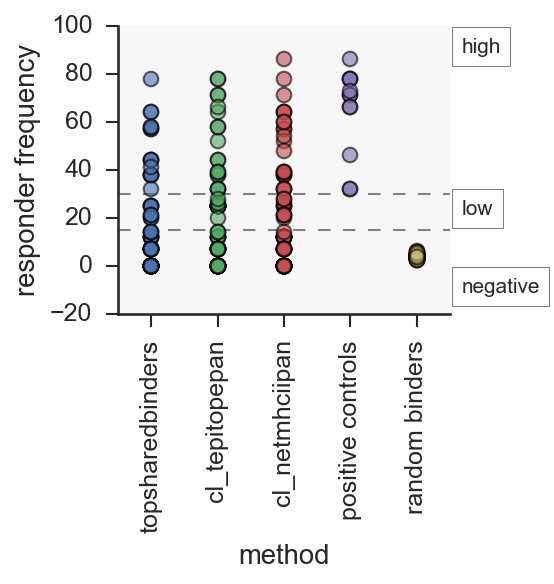

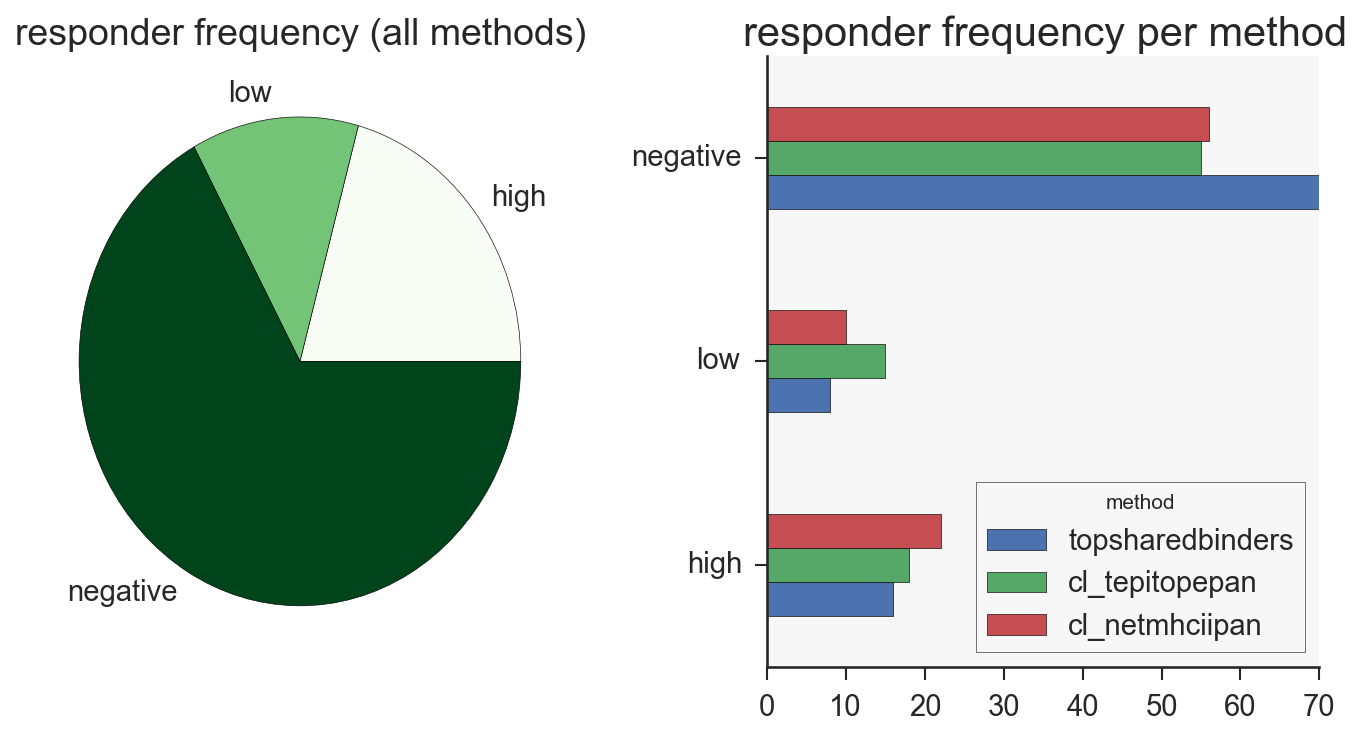

In [224]:
sns.set_context("notebook", font_scale=1.2)
#final.hist('score',by='method',stacked=True,figsize=(5,3),sharex=True,bins=range(0,100,5))
final = pd.read_csv('final_results_all.csv')
final = final.replace('_pos ctrls','positive controls')
g=sns.factorplot(x='method',y='score',data=final,kind='strip',
                 edgecolor='black',aspect=0.8,alpha=.6)
ax=g.axes.flatten()[0]
ax.set_ylabel('responder frequency')
for i in ax.get_xticklabels():
    i.set(rotation=90)
ax.axhline(15,0,100,linewidth=1, color='gray',linestyle='--')    
ax.axhline(30,0,100,linewidth=1, color='gray',linestyle='--')    
g.fig.text(.98, .9, 'high', bbox={'facecolor':'white','alpha':0.8, 'pad':10})
g.fig.text(.98, .63, 'low', bbox={'facecolor':'white','alpha':0.8, 'pad':10})
g.fig.text(.98, .5, 'negative', bbox={'facecolor':'white','alpha':0.8, 'pad':10})

sns.despine()
plt.tight_layout()
plt.savefig('responder_freqs_stripplot.png',bbox_inches='tight')

x = final[-final.method.isin(['positive controls','random binders'])]

s3 = responsesbreakdown(x, key='confidence', label='responder frequency') 
plt.savefig('responses_bymethod_confidence.png')
s3.columns = s3.columns.astype('string')
s3['%pos'] = s3[s3.columns[-2:]].sum(1)/s3.sum(1)*100
#hydroplot(final, key='confidence')
print s3[s3.columns[1:4]].sum(1).sum()/270.0
display(s3)

ctrl = final[final.method == 'positive controls']
print 'mean score of positive controls:', ctrl.score.mean()

### look at top peptide and shared binders

In [226]:
final = pd.read_csv('final_results_all.csv')
#top peptides (high confidence) and their protein info
cols = ['locus_tag','mbname','peptide','method','score','#wbpos','#pbmcpos','confidence','start']

top = final[final.confidence.isin(['high','low'])]
top = top[top.method != '_pos ctrls']
neg = final[final.confidence=='negative']

#overlap of our final sets with known antigens
EpitopePipeline=reload(EpitopePipeline)
antigens = EpitopePipeline.getAntigenDatasets()
antigens['source'] = antigens.source.apply(lambda r: ';'.join(r))
top = antigens.merge(top[cols],on='locus_tag',how='right')

annot = EpitopePipeline.combineAnnotationData()
#kruh = pd.read_csv('Kruh_proteome_30d.csv')
#print top[top.locus_tag.isin(kruh.locus_tag)]
#add annotations
top = top.merge(annot[['locus_tag','gene','length','product']],on='locus_tag',how='left')
top = top.sort_values(['score','locus_tag'],ascending=[False,True]).fillna('')
top = top.reset_index(drop=True)
top.to_csv('top_peptides.csv',index=False)

print '%s peptides in high and low category' %len(top)
print 'total positive rate: %s' %str(len(top)/270.0)
print

#print top.columns
topc = top.groupby('locus_tag').agg({'peptide':np.size,
                                     'product':base.first}).sort_values('peptide',ascending=False)
topc = topc.rename(columns={'peptide':'positives'})
#print topc[:5]

tsp = final.groupby('locus_tag').agg({'method':base.first,'R':np.size})
tsp = tsp.rename(columns={'R':'prots'})

#print final.groupby('locus_tag').agg({'method':base.first,'R':np.size,'peptide':np.size})

#lt='Rv0655'
lt='Rv3676'
#lt='Rv0757'
#lt='Rv3584'
display(final[final.locus_tag==lt][cols].sort_values('start'))

print 'proteins with most positives:'
x = tsp.merge(topc,left_index=True,right_index=True)
x = x[x.positives>1].sort_values(['positives','method'],ascending=False)
display(x)
#print x.groupby('prots').agg({'positives':np.sum})
#x['frac'] = x.peptide/x.prots
#x.plot('prots','frac',kind='scatter',figsize=(4,4))
print 'peptides with highest scores:'
display( top[top.score>64.75][cols])

89 peptides in high and low category
total positive rate: 0.32962962963



,locus_tag,mbname,peptide,method,score,#wbpos,#pbmcpos,confidence,start
248,Rv3676,Mb3700,PGDRLYIIISGKVKIGRRAP,topsharedbinders,58,75,42,high,42
179,Rv3676,Mb3700,EISEQLLRVLARRLRRTNNN,topsharedbinders,57,100,14,high,117
128,Rv3676,Mb3700,FAHRGWIRLEGKSVLISDSE,topsharedbinders,0,0,0,negative,197
121,Rv3676,Mb3700,RLEGKSVLISDSERLARRAR,topsharedbinders,38,75,0,high,204


proteins with most positives:


,prots,method,product,positives
locus_tag,,,,
Rv3676,4,topsharedbinders,Transcriptional regulatory protein Crp (Crp/Fnr-family),3
Rv3584,3,topsharedbinders,Possible conserved lipoprotein LpqE,2
Rv0757,4,topsharedbinders,Possible two component system response transcriptional positive regulator PhoP,2
Rv2429,2,cl_tepitopepan,Alkyl hydroperoxide reductase D protein AhpD (alkyl hydroperoxidase D),2
Rv1833c,2,cl_netmhciipan,Possible haloalkane dehalogenase,2
Rv3390,2,cl_netmhciipan,Probable conserved lipoprotein LpqD,2


peptides with highest scores:


,locus_tag,mbname,peptide,method,score,#wbpos,#pbmcpos,confidence,start
0,Rv3732,Mb3759,PYVRDGWAFVAIRLTSTDLI,cl_netmhciipan,86,100,71,high,178
1,Rv1822,Mb1853,DWADGKIARLLNQSSRLGAL,cl_tepitopepan,78,100,57,high,53
2,Rv2140c,Mb2164c,PGGALTLVNDAGMRRYVGAA,topsharedbinders,78,100,57,high,102
3,Rv3671c,Mb3695c,NEAAPTWLKTVPKRLSALLN,cl_tepitopepan,78,100,57,high,150
4,Rv3863,Mb3893,LAADGIINAGALIAFEKGRS,cl_netmhciipan,78,100,57,high,183
5,Rv1591,Mb1617,TQAPPVFFARRPLQIALTLM,cl_tepitopepan,71,100,42,high,158
6,Rv1762c,Mb1793c,EHLEFMAVGTAVRYTAKPGA,cl_netmhciipan,71,100,42,high,111
7,Rv1833c,Mb1864c,VMSSPPVQYAILRRNFFVER,cl_tepitopepan,71,100,42,high,154
8,Rv2412,Mb2435,RNKAVKSSLRTAVRAFREAA,cl_tepitopepan,66,75,57,high,20


227 227


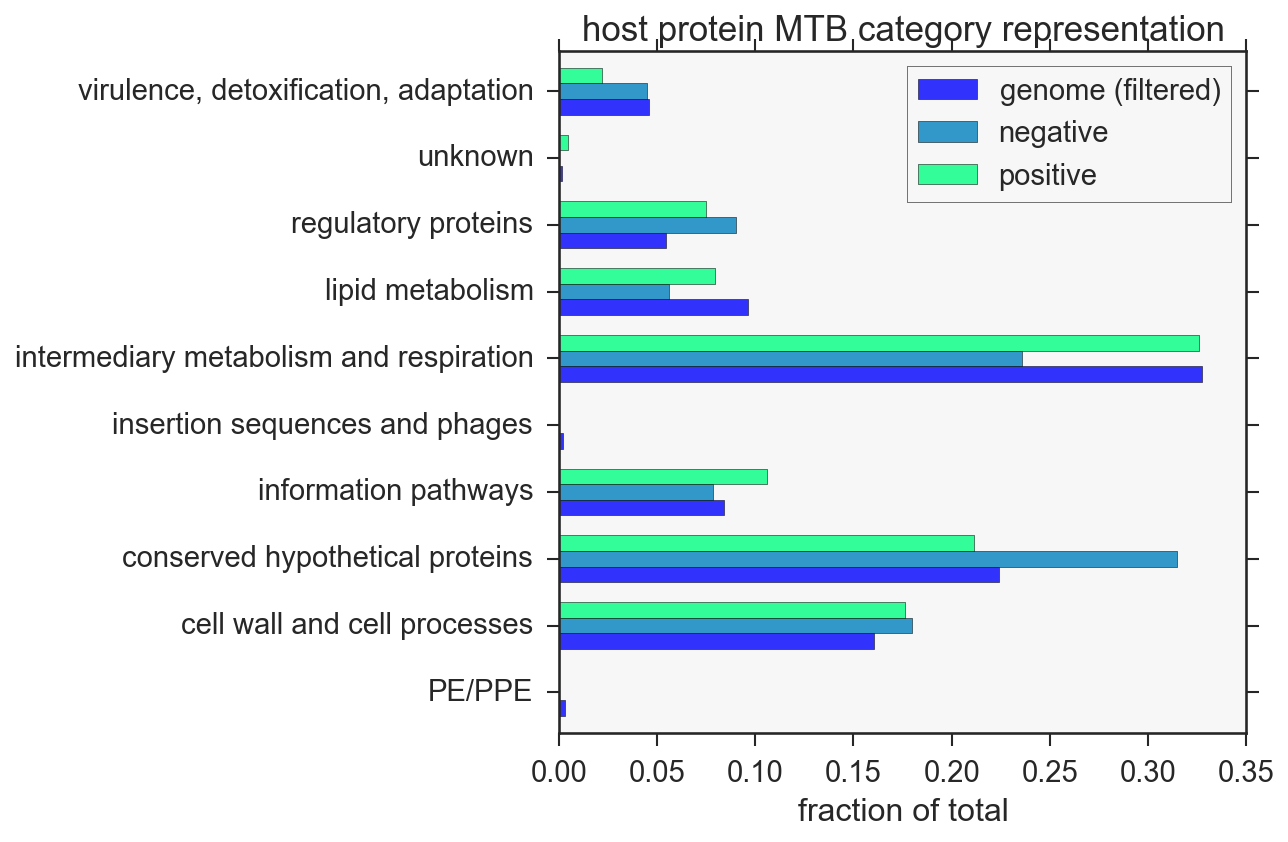

In [120]:
#cg = EpitopePipeline.getCategories(genome,plot=False)
cg = EpitopePipeline.getCategories(srm,plot=False)

cneg = EpitopePipeline.getCategories(neg,plot=False)
cpos = EpitopePipeline.getCategories(top,plot=False)

print len(neg), cneg.sum()

cats = pd.concat([cg,cpos,cneg],axis=1)
cats = cats/cats.sum()
cats.columns=(['genome (filtered)','negative','positive'])
ax=cats.plot(kind='barh',cmap='winter',alpha=0.8,width=.7,grid=False,figsize=(9,6))
plt.xlabel('fraction of total')
ax.set_title('host protein MTB category representation')
plt.tight_layout()
plt.savefig('vlaresults_cats.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20c0bdab10>], dtype=object)

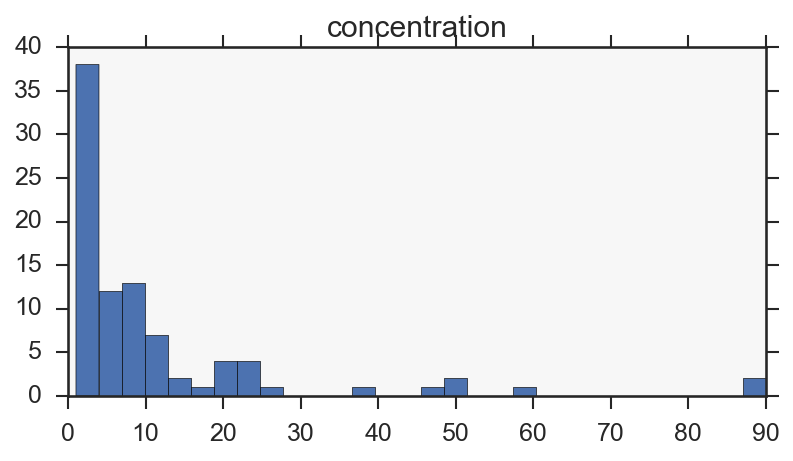

In [17]:
#srm concentrations of positives?
c = top.merge(srm, on='locus_tag', how='left')
f,ax=plt.subplots(1,1,figsize=(6,3))
c.hist('concentration',bins=30,ax=ax,grid=False)
#ax.set_yscale('log')
#print c[c['concentration_y']>10][['locus_tag','concentration_y','score','product_y']]

Index([u'Unnamed: 0', u'#garethpos', u'#pbmcpos', u'#wbpos', u'1-log50k(aff)', u'7010', u'7447',
       u'7448', u'7449', u'7852', u'7853', u'7855', u'8740', u'8742', u'8743', u'8744', u'R',
       u'RVL', u'allele', u'binders', u'clustersize', u'concentration', u'core', u'end', u'gene',
       u'hydro', u'id', u'id_x', u'id_y', u'identity', u'iedbmhc1_11_overlap',
       u'iedbmhc1_9_overlap', u'length', u'locus_tag', u'mbname', u'mean', u'method',
       u'mhc1overlaps', u'name', u'nearest', u'order', u'overlap', u'pep_no', u'peplength',
       u'peptide', u'pos', u'product', u'rank', u'score', u'source', u'start', u'tag', u'tbname',
       u'translation', u'wbmean', u'well_no', u'confidence'],
      dtype='object')


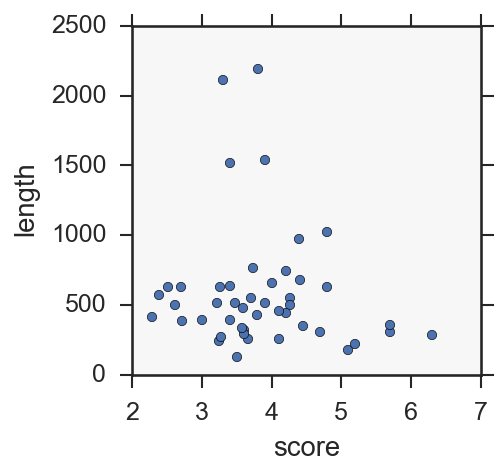

In [18]:
#clusters correlation with positives and no. binders..?
f=pd.read_csv('final_results_all.csv')
print f.columns
f.plot('score','length',kind='scatter',figsize=(3,3))

#tsb correlation with binders in each epitope R?..


### mhc1 overlaps and positives

overlap  method          
0        baseline            30
         topsharedbinders    46
1        baseline            64
         cl_netmhciipan      88
         cl_tepitopepan      88
         topsharedbinders    48
dtype: int64
                mean       std  size
confidence                          
high        1.933333  1.791514    15
low         1.848485  1.438776    33
medium      2.195122  1.584606    41
negative    1.669604  1.537468   227


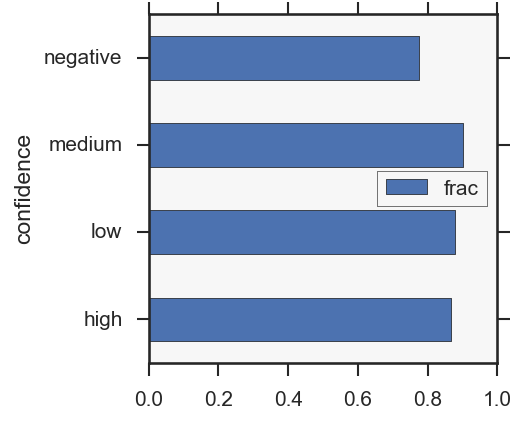

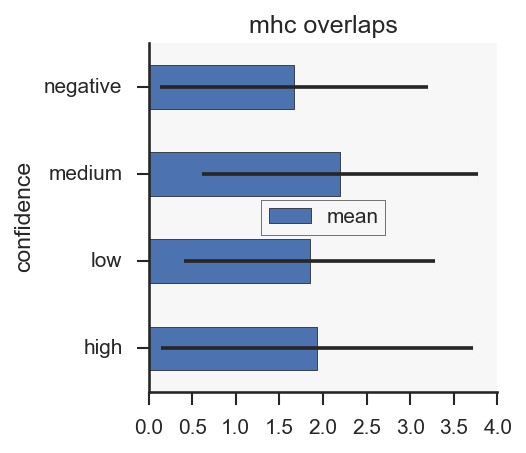

In [19]:
f=pd.read_csv('final_results_all.csv')
#f['confidence'] = f.confidence.map({'negative':0,'low':1,'medium':2,'high':3})
f['confidence'] = pd.Categorical(f.confidence)
sns.set_context("notebook", font_scale=1.0)
#f = f[f.method.isin(['topsharedbinders'])]
#f['mhc1overlaps'] = f.filter(regex="iedbmhc1_").sum(axis=1)
f['overlap'] = (f.mhc1overlaps>=1).astype(int)

xx = f[-f.mhc1overlaps.isnull()]
cols=['peptide','method','iedbmhc1_9_overlap','iedbmhc1_11_overlap','overlap']
#print xx[cols][22:34]

print xx.groupby(['overlap','method']).size()

gg = xx.groupby(['confidence']).agg({'overlap': [np.sum,np.size]})
gg.columns = gg.columns.get_level_values(1)
gg['frac'] = gg['sum']/gg['size']
#print gg

#gg.plot(y='overlap',kind='barh',by='overlap',figsize=(3,3))
gg.plot(y='frac',kind='barh',figsize=(3,3))


#xx.plot('mhc1overlaps','confidence',kind='scatter',figsize=(2,2))
gg = xx.groupby(['confidence']).agg({'mhc1overlaps': [np.mean,np.std,np.size]})
gg.columns = gg.columns.get_level_values(1)
print gg
gg.plot(y='mean',xerr='std',kind='barh',figsize=(3,3))
plt.title('mhc overlaps')
sns.despine()
#xx.hist('mhc1overlaps',by='confidence')

### distributions of BoLA alleles

**references:**

* A. B. Dietz, N. D. Cohen, L. Timms, and M. E. Kehrli, “Bovine lymphocyte antigen class II alleles as risk factors for high somatic cell counts in milk of lactating dairy cows.,” J. Dairy Sci., vol. 80, no. 2, pp. 406–412, 1997.
* J. Oprządek, P. Urtnowski, G. Sender, A. Pawlik, and M. Łukaszewicz, “Frequency of BoLA-DRB3 alleles in Polish Holstein-Friesian cattle,” Anim. Sci. Pap. Reports, vol. 30, no. 2, pp. 91–101, 2012.
* R. Baxter, N. Hastings, a. Law, and E. J. Glass, “A rapid and robust sequence-based genotyping method for BoLA-DRB3 alleles in large numbers of heterozygous cattle,” Anim. Genet., vol. 39, no. 5, pp. 561–563, 2008.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: FutureWarning: order is deprecated, use sort_values(...)


name,baxter,dietz,oprzadek
index,,,
*24,-,0.1429,0.207
*08,-,0.141,0.137
*22,-,0.1429,0.1239
*27,0.2,0.0369,-
*11,0.16,0.0851,0.031
*16,0.1,0.1001,0.0752
*23,-,0.091,0.0819
*06,0.06,-,-
*09,0.06,-,-


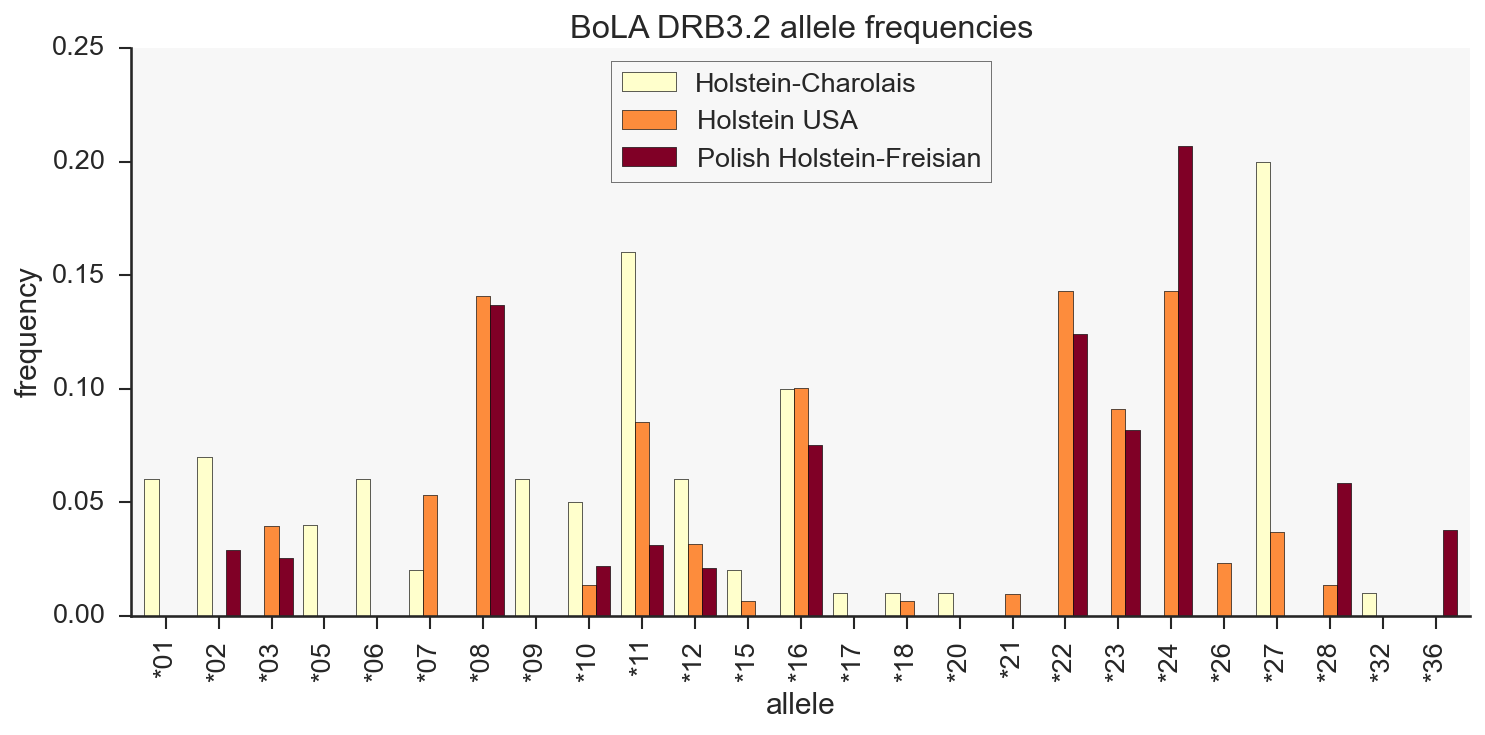

In [25]:
#bola alleles plots
bd = pd.read_csv('bola_alleles_dietz.csv')
bd=bd.set_index('allele').sort('freq',ascending=False)
bd['name'] = 'dietz'

bo = pd.read_csv('bola_alleles_oprzadek.csv')
bo = bo.groupby('allele_short').agg({'freq':np.max})
bo=bo.sort('freq',ascending=False)
bo['name'] = 'oprzadek'

bx = pd.read_csv('bola_alleles_baxter.csv')
bx = bx.groupby('allele_short').agg({'freq':np.max})
bx=bx.sort('freq',ascending=False)
bx['name'] = 'baxter'

x=pd.concat([bd,bo,bx]).reset_index('allele')
x = x.pivot('index','name','freq')
x=x[x>0.005].dropna(how='all')
table = x[x>0.02].reindex_axis(x.mean(1).order(ascending=False).index).dropna(how='all').fillna('-')

sns.set_context("notebook", font_scale=1.3)
x.plot(y=['baxter','dietz','oprzadek'],kind='bar',figsize=(10,5),cmap='YlOrRd',grid=False,width=0.8)
plt.title('BoLA DRB3.2 allele frequencies')
plt.xlabel('allele')
plt.ylabel('frequency')
plt.legend(labels=['Holstein-Charolais','Holstein USA','Polish Holstein-Freisian'],loc=9)
sns.despine()
plt.tight_layout()
plt.savefig('bola_allelefreqs.png')
targetbola = x.index
table

/home/farrell/python/sandbox/mhcpredict/Tepitope.py:325: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort(['nearest'], inplace=True)
/home/farrell/python/sandbox/mhcpredict/Tepitope.py:338: FutureWarning: order is deprecated, use sort_values(...)
  h = h.reindex_axis(h.mean().order().index, axis=1)


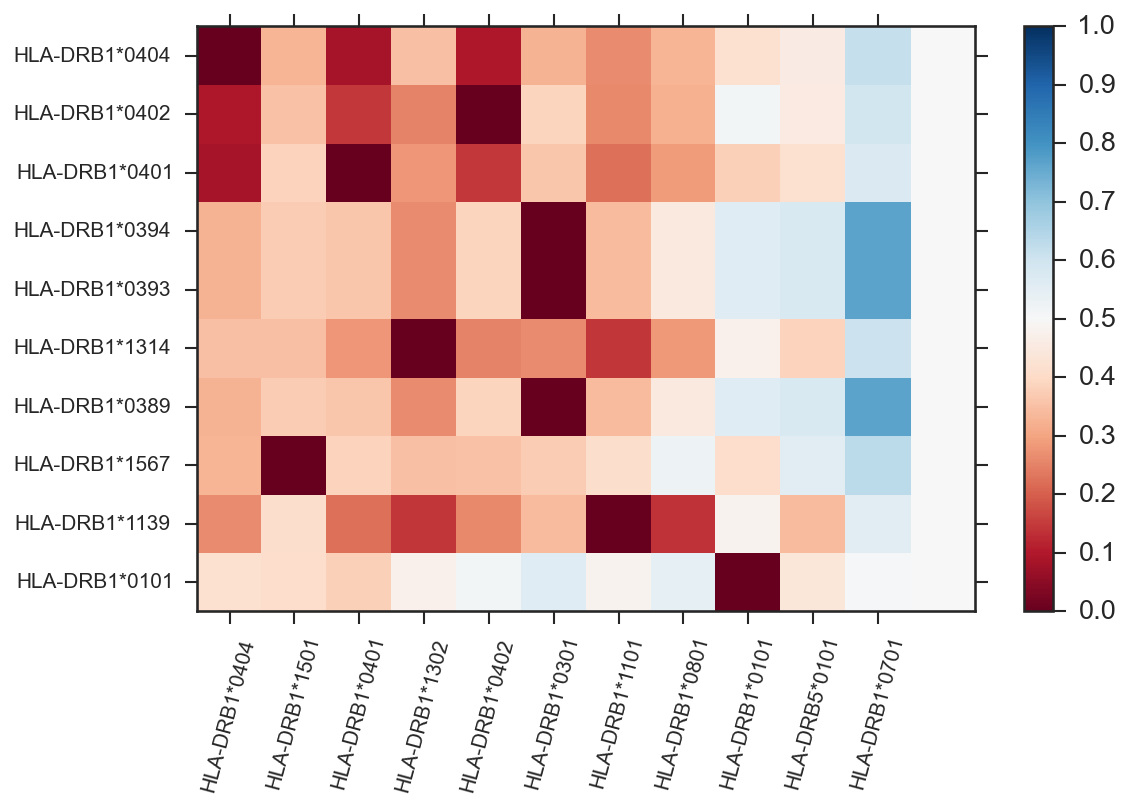

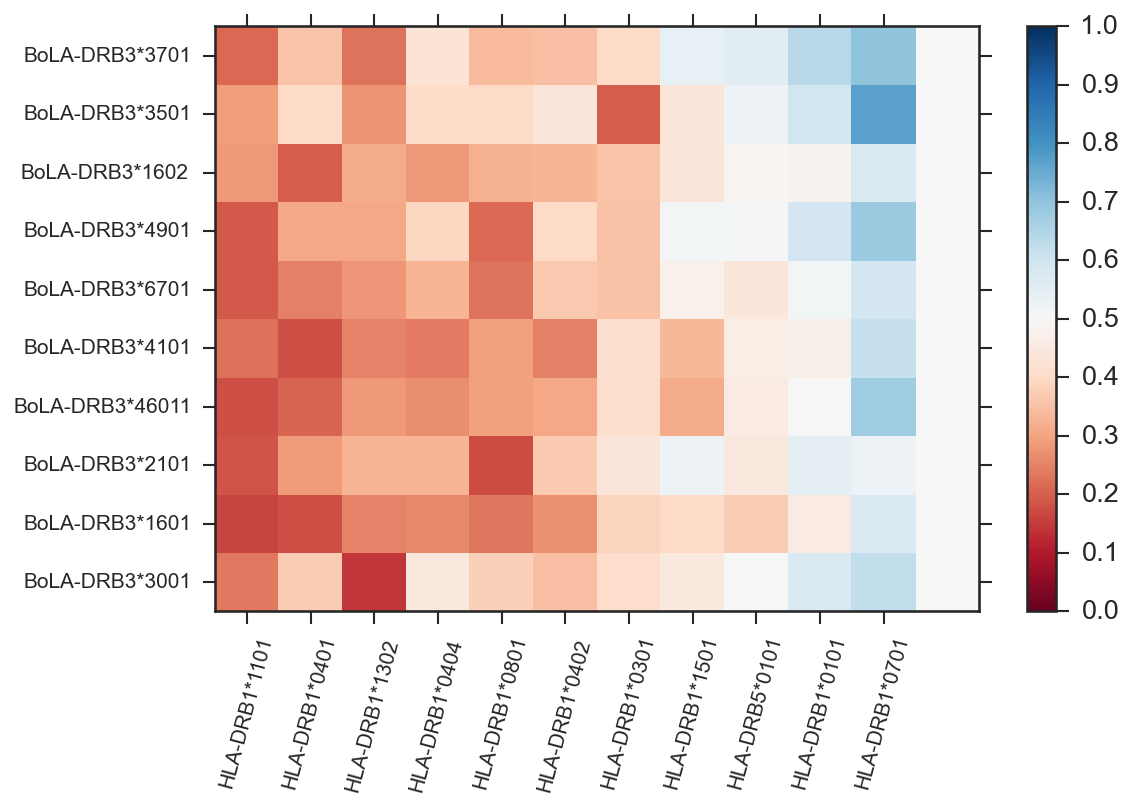

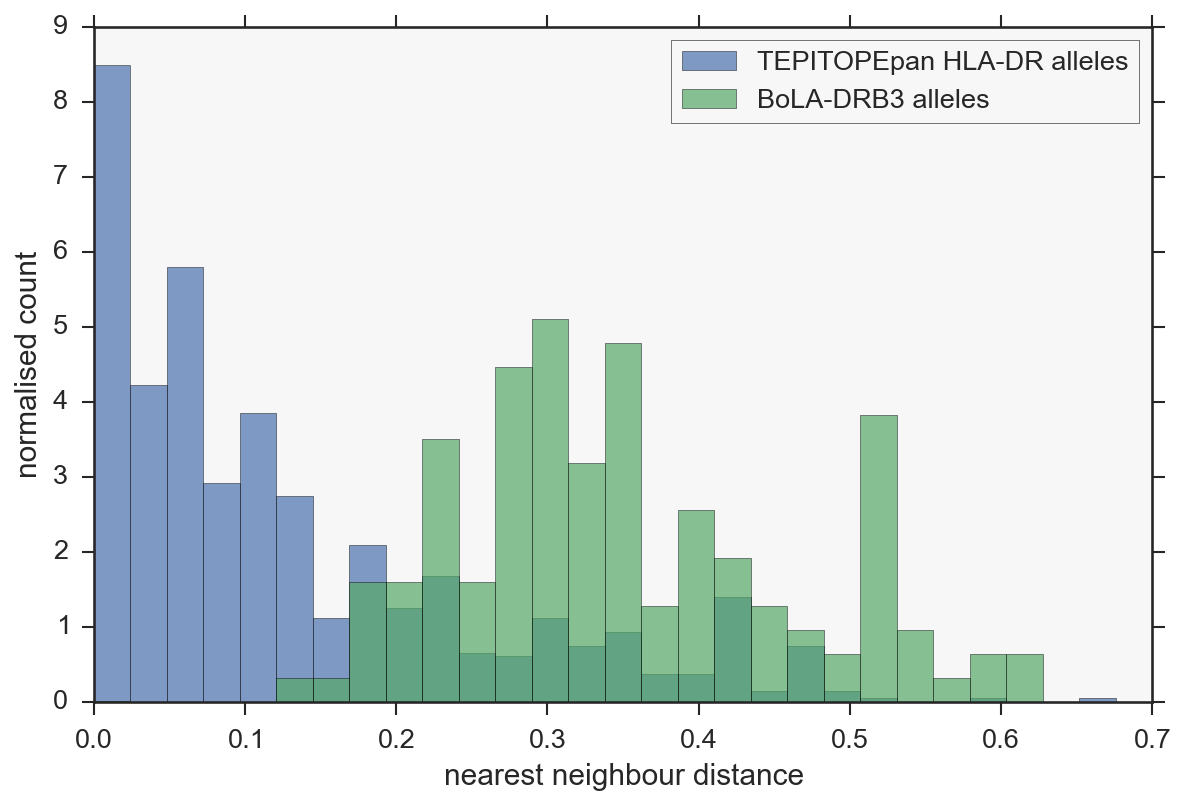

In [26]:
reload(Tepitope)
d=Tepitope.datadir
boladrb = os.path.join(d,'IPD_MHC/bola.drb3.fa')
hladrb = os.path.join(d,'IPD_MHC/hla.drb345.fa')
ref = os.path.join(d,'IPD_MHC/hlaref.fa')
aln = Tepitope.drbaln
alnindex = dict([(a.id,a) for a in aln])
Tepitope.compareRef(hladrb,boladrb,ref,alnindex)


ref
HLA-DRB3*0201    0.158295
nearest          0.160000
HLA-DRB1*1101    0.162258
HLA-DRB1*0801    0.172932
HLA-DRB1*1301    0.173228
HLA-DRB1*0401    0.176024
HLA-DRB1*1401    0.182514
HLA-DRB1*0301    0.198380
HLA-DRB3*0101    0.212574
HLA-DRB1*1601    0.252501
dtype: float64


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


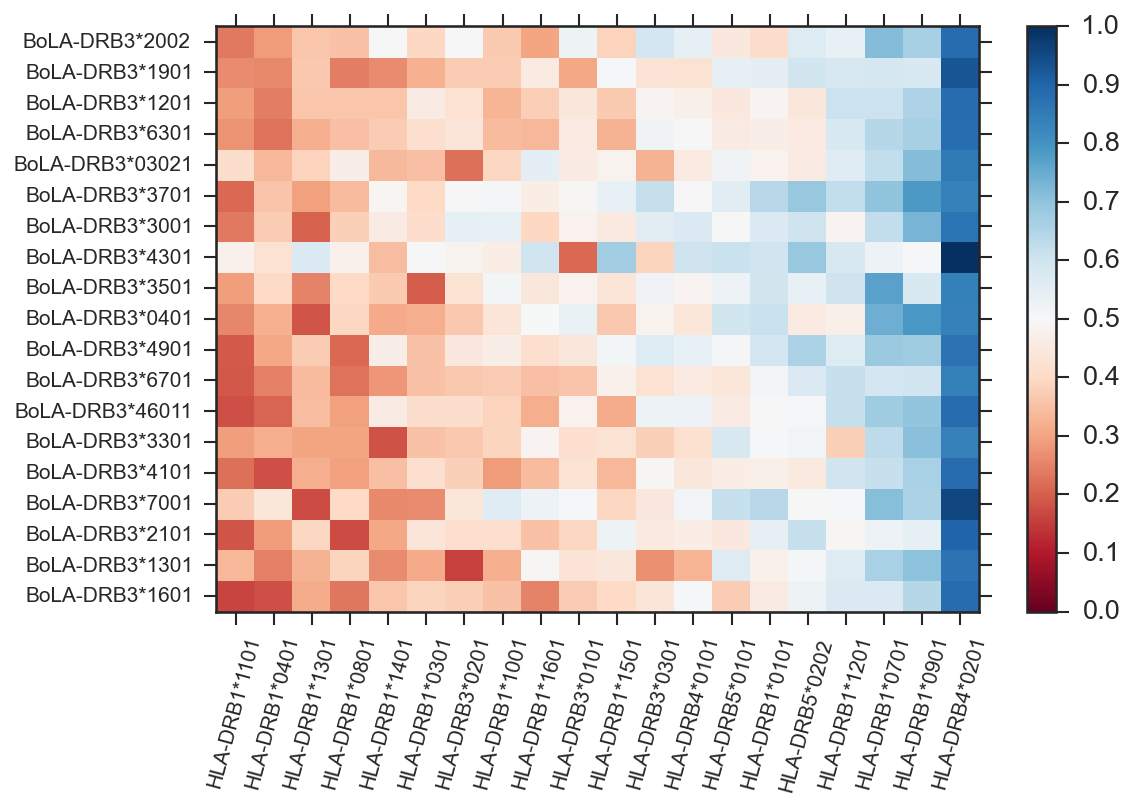

In [27]:
reload(Tepitope)
a = Tepitope.compare(hladrb, boladrb, alnindex)
hlas = a.min()
hlas.sort()
print hlas[:10]

In [118]:
#old vla negatives
gp = pd.read_csv('gareth_negatives.csv')
#how to find epitope ranking in our binders?
#print b1[:10]
#print neg[:2]

def findinGenome(genome, peptide):
    t = genome[genome.translation.str.contains(peptide)]
    if len(t)>0:
        return t.head(1).squeeze().locus_tag
    else:
        return ''
    
gp['locus_tag'] = gp.apply( lambda x: findinGenome(genome, x.sequence), 1)
print gp[:10]

     id              sequence locus_tag
0   BV1  RTTIKRWFPGFMTFRFLECG    Rv0032
1   BV2  MMMHNIQRPTLPDDMSEEFC    Rv0032
2   BV3  MMDIQLHEPTMWKHSPSRSR    Rv0058
3   BV4  PHDWIVWHFTHADNLPGIIT    Rv0059
4   BV5  FVDFDLLCQRQWHNTDDDPN    Rv0059
5   BV6  FDLLCQRQWHNTDDDPNRQS    Rv0059
6   BV7  DGPKHIINFPTKKHWRAPSK    Rv0060
7   BV8  YPHSPRLIEYTWQLRHNVTF    Rv0065
8   BV9  RLVNWQRIRHRWNWTDVRRW    Rv0071
9  BV10  KGKWEHSAPIKWPPPQTLHE    Rv0089


In [ ]:
def hasseq(r, seqs):    
    for s in seqs:
        if s in r.sequence:
            return 1
    return 0

x = b4[b4.name.isin(gp.locus_tag)]
#need to reduce similarity of gareth peptides

gp['pred_binder'] = gp.apply(lambda r: hasseq(r, x.core),1)
print gp[gp['pred_binder']==1]

### epitope conservation analysis

In [212]:
sys.path.append(os.path.join(home,'gitprojects'))
reload(analysis)
db = os.path.join(home,'myco_genomes/all_genomes') #local blastdb

res = pd.read_csv('final_results_all.csv')
res = res[res.method!='_pos ctrls']
print len(res)

cons=[]
for i,r in list(res.iterrows()):
    #print i, r.peptide, r.locus_tag, r.confidence
    tag = r.locus_tag
    p = genome[genome['locus_tag']==tag]
    seq = p.translation.head(1).squeeze()    
    #blast local db
    recs = analysis.getLocalOrthologs(seq,db)
    recs['accession'] = recs.apply(lambda x: x.subj.split('|')[2].split()[1],1)
    recs = recs[recs.perc_ident>50]
    #which part of peptide to use??
    pep = r.peptide[2:18]
    c = analysis.findConservedPeptide(pep,recs)
    c = c.reset_index()    
    c['species'] = c.accession.apply(lambda x : re.split("\d+", x)[0][:3])
    c['name'] = r.peptide
    c = c.drop_duplicates('species')
    #print c
    cons.append(c)

df = pd.concat(cons)
df = df.dropna()
s = df.set_index(['name','species'])
s = s.drop('accession',1)

s = s.unstack(level=-1)
s=s.clip(upper=1)
s=s.fillna(0)
s.columns = s.columns.get_level_values(1)
s = s.merge(res[['peptide','locus_tag','confidence','score']], left_index=True, right_on='peptide')

s.to_csv('peptide_conservation.csv')
print len(s)

364
364


            M.canetti  M.abscessus  M.avium.para  M.leprae  M.marinum  M.smegmatis  M.ulcerans  \
confidence                                                                                       
negative     0.869091     0.069091      0.163636  0.141818   0.225455     0.094545    0.196364   
positive     0.932584     0.101124      0.213483  0.134831   0.292135     0.123596    0.247191   

             M.bovis  MTB-H37Rv  
confidence                       
negative    0.981818          1  
positive    1.000000          1  
M.canetti 0.102868542727
M.abscessus 0.324953230525
M.avium.para 0.283502472892
M.leprae 0.869253398321
M.marinum 0.201808414144
M.smegmatis 0.431404827818
M.ulcerans 0.305792383266


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: FutureWarning: order is deprecated, use sort_values(...)


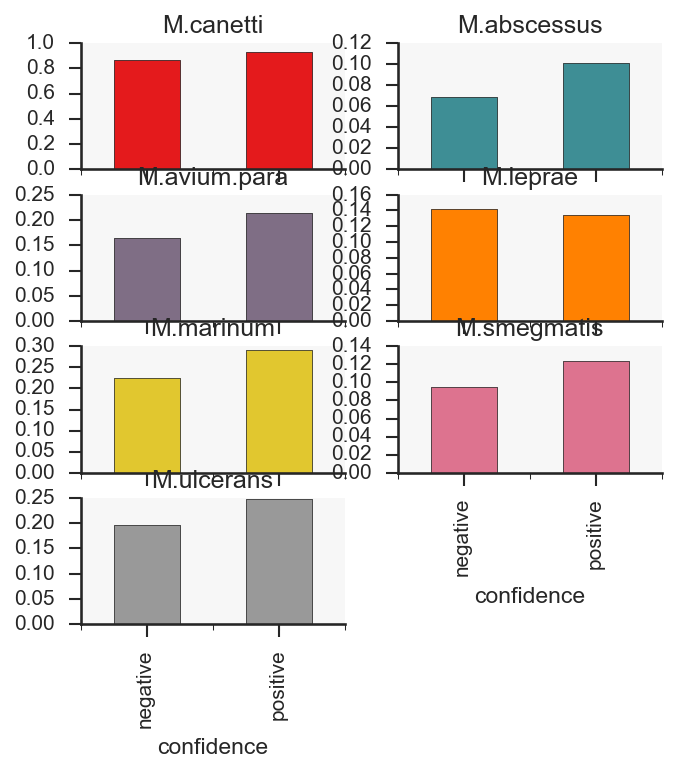

In [278]:
sns.set_context("notebook", font_scale=1.0)
s = pd.read_csv('peptide_conservation.csv',index_col=0)
#replace col names with species
spnames = {'MAB':'M.abscessus','MAF':'M.africanum','MAP':'M.avium.para','ML':'M.leprae','MMA':'M.marinum',
           'Rv':'MTB-H37Rv','MUL':'M.ulcerans','BN':'M.canetti','Mb':'M.bovis','MSM':'M.smegmatis'}
species = spnames.values()
s=s.rename(columns=spnames)
s=s.fillna('negative')
#sort by counts on both axes
#s=s.set_index(['confidence','peptide']) #'['locus_tag','peptide'])
#s=s.reindex_axis(s.sum().order().index, axis=1)
#s=s.reindex_axis(s.sum(1).order().index)

s.ix[s.confidence!='negative','confidence'] = 'positive'

#s=s.sortlevel()
totals = s.sum(1).order(ascending=False)
a = s[s.confidence=='negative']
b = s[s.confidence=='positive']  
g = s.groupby('confidence').agg(lambda x: x.sum()/x.count())
print g

#z-test for significance of proportions?
from statsmodels.stats.weightstats import ztest
for i in s.columns[:7]:
    z=ztest(a[i],b[i])
    print i, z[1]

#fig,ax = plt.subplots(1,1,figsize=(5,5))
#analysis.plotheatmap(g,ax)
g.plot(y=g.columns[:7],layout=(4,2),legend=False,colormap='Set1',       
       kind='bar',figsize=(5,5),subplots=True)
sns.despine()

#plt.savefig('peptide_conservation_map.png')

In [ ]:
#homology of 20mers within m.bovis?
reload(analysis)
db = os.path.join(home,'myco_genomes/mbovis') #local blastdb
x = res[res['#wbpos']>=50].dropna(subset=['pep_no'])

cons=[]
for i,r in list(x.iterrows()):
    #print i, r.peptide, r.locus_tag
    tag = r.locus_tag
    seq = r.peptide
    #blast local db
    recs = analysis.getLocalOrthologs(seq,db)
    if len(recs)>1:
        print tag, r['product']
        print recs
    

In [31]:
#overlap with known iedb tcell epitopes?
iedb = pd.read_csv('iedb_myco_tcell.csv')
iedb=iedb.drop_duplicates('peptide')
iedb = iedb[iedb['Source Organism Name'].str.contains('bovis')]
#print iedb.groupby('Source Molecule Name').size()

In [117]:
#position of Rv3874 in all tepitope binders
b=b4
sb = b.sort('score',ascending=0)
#sb = b.sort('1-log50k(aff)')
sb =sb.reset_index()
print len(sb)
print sb[sb.name=='Rv3874']

47370
       index  allele       core    name    peptide  pos   score    method  nearest
10842      0       8  IRQAGVQYS  Rv3874  IRQAGVQYS   75  4.4000  tepitope       20
31101      1       4  MKTDAATLA  Rv3874  MKTDAATLA    3  3.3000  tepitope       52
35932      2       5  VRFQEAANK  Rv3874  VRFQEAANK   55  3.0992  tepitope       20


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [276]:
#calculation 20mers in proteome
n=20
prots=len(mbovis)
l=(mbovis.length-n-1).sum()
nmers = l*n*prots
print prots, l

3961 1228066.0
